# Uber Rides Data Analysis 

In [1]:
#Importing required libraries:

import numpy as np                #for performing mathematical functions on arrays
import pandas as pd               #for analyzing data             
import seaborn as sns             #for visualizing data          
import matplotlib.pyplot as plt   #for visualizing data 
%matplotlib inline  


In [2]:
#Reading data:

data = pd.read_csv('Uber_drives_data.csv')
print(data.shape)                  #printing the number of rows and columns respectively
data.head(5)                       #printing the top 5 rows

(1155, 7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


The given dataset has 1155 rows and 7 columns, containing all the information about the Uber rides. The user has booked 1155 trips over the year (including those which have been cancelled).

In [3]:
#Understanding the data more:

data.describe()    #for statistical description of data

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


The average distance of the user's rides is around 21 miles.

In [4]:
#Checking the need for data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Out of 1155 values in Purpose column, only 653 have some values. Rest have null values.

In [5]:
#Checking if there is any duplicate value:

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

The dataset does not have any duplicate values.

In [6]:
#Renaming column names for clarity:

data.columns = ['Start_Date','End_Date','Category','Start_Point','Stop_Point','Miles','Purpose']
data.head(5)    #printing top 5 rows

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
data.isnull().sum()     #Counting number of null values

Start_Date       0
End_Date         0
Category         0
Start_Point      0
Stop_Point       0
Miles            0
Purpose        502
dtype: int64

Clearly, the dataset does have null values. The data needs to be cleaned in order to do its analysis and visualization.

<AxesSubplot:>

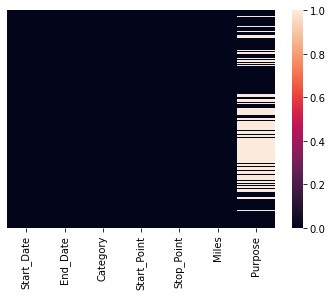

In [8]:
sns.heatmap(data.isnull(), yticklabels = False)   #Visualization of null values

Clearly, the 'Purpose' column contains a lot of null values. The null values in Purpose column can't be dropped as doing this leads to working with approximately half of the data. 

In [9]:
#Setting null values in the Purpose column to 'Unknown' as the purpose is not mentioned for them

data['Purpose'] = data['Purpose'].fillna('Unknown')
data.head()


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
#Checking if data is cleaned or not:

data.isnull().sum()

Start_Date     0
End_Date       0
Category       0
Start_Point    0
Stop_Point     0
Miles          0
Purpose        0
dtype: int64

Clearly, there are no null values left.

<AxesSubplot:>

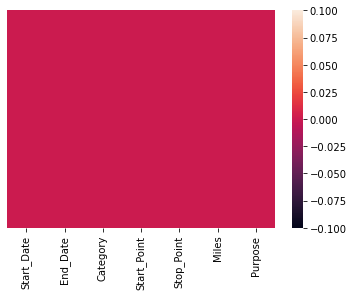

In [11]:
sns.heatmap(data.isnull(), yticklabels = False)

Clearly, there are no null values left.

At this stage, in the data, the start and end dates are given, but not the duration of the rides. The duration is needed in order to know how much time did the rides took. For this, it is needed to convert the Start Date and End Date data objects into datetime objects.

In [12]:
#Converting the Start_Date and End_Date date objects into datetime objects to get duration:
#Using Pandas library

data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['End_Date'] = pd.to_datetime(data['End_Date'])

data.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Segregating the hour, day of the week and month is needed for further analysis.

In [13]:
#Creating new columns of hour, day of the week and month:

data['Hour'] = data['Start_Date'].apply(lambda conversion: conversion.hour)
data['Day_of_the_Week'] = data['Start_Date'].apply(lambda conversion: conversion.dayofweek)
data['Month'] = data['Start_Date'].apply(lambda conversion: conversion.month)

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,4,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,5,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,5,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,2,1


For proper analysis, the Day of the week and Month columns need to be in words, for example, 0 means Monday, 1 means Tuesday etc. in Day of the week column while in month column, 1 means January, 2 means February etc.

In [14]:
#Creating a dictionary for Day of the week column:
A = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['Day_of_the_Week'] = data['Day_of_the_Week'].map(A)

data.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,1


In [15]:
#Creating a dictionary for Month column:

B = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
data['Month'] = data['Month'].map(B)

data.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January


In [16]:
#Calculating duration of the rides:

data['Ride_Duration'] = data['End_Date'] - data['Start_Date']

data.head()

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,0 days 01:07:00


In the dataset, the ride_duration is given in terms of days and time. Days need to be removed from the duration.

In [17]:
#Removing days from the Ride_Duration: (First converting the Ride_Duration into string type and then slicing the remaining part after days)

data['Ride_Duration'] = data['Ride_Duration'].astype(str).map(lambda x: x[7:])

data.head(5)

,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,01:07:00


Here, 00:06:00 means 6 minutes duration while 01:07:00 means 1 hour, 7 minutes duration. 
The dataset is now ready for visualization.

### Visualizing the data

Text(0, 0.5, 'Number of rides')

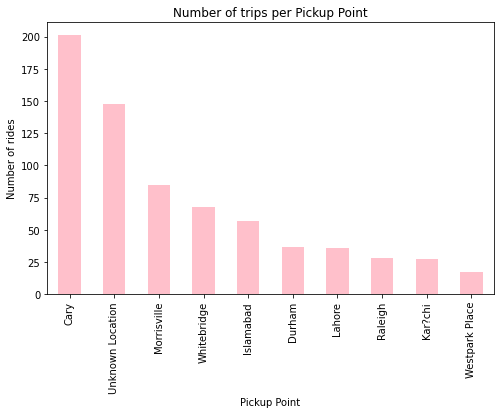

In [116]:
#Checking the most common pickup points of the Uber rides:

data.Start_Point.value_counts().nlargest(10).plot(kind='bar', figsize=(8,5),color=['pink'])
plt.title('Number of trips per Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of rides')

Most of the Uber rides have started from Cary and mostly pickup points are unknown.

Text(0, 0.5, 'Number of rides')

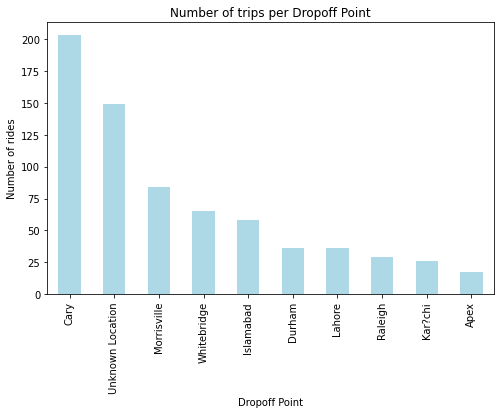

In [117]:
#Checking the most common dropoff locations of the Uber rides:

data.Stop_Point.value_counts().nlargest(10).plot(kind='bar', figsize=(8,5),color=['lightblue'])
plt.title('Number of trips per Dropoff Point')
plt.xlabel('Dropoff Point')
plt.ylabel('Number of rides')

Most of the Uber rides have ended at Cary and mostly dropoff points are unknown.

Text(0.5, 1.0, 'Purpose of Uber rides')

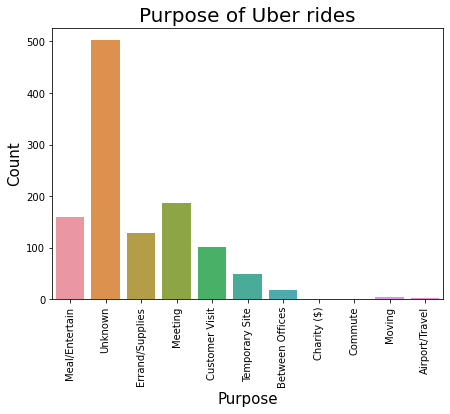

In [118]:
#To know for what purpose the user uses Uber for:

plt.figure(figsize=(7,5))
a = sns.countplot(x='Purpose', data = data)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel("Purpose", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Purpose of Uber rides', fontsize = 20)

It is evident that for most of the rides, the purpose is unknown. For other rides, the user prefers Uber rides to go for any meeting and for meal/entertainment purposes.

Text(0.5, 1.0, 'Category of Uber rides')

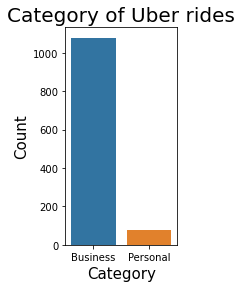

In [18]:
#To know for what category the user uses Uber for:

plt.figure(figsize=(2,4))
a = sns.countplot(x='Category', data = data)
a.set_xticklabels(a.get_xticklabels())
a.set_xlabel("Category", fontsize = 15)
a.set_ylabel("Count", fontsize = 15)
a.set_title('Category of Uber rides', fontsize = 20)

The user prefers Uber rides for his/her business work for 1000+ rides.

In [120]:
#Checking the maximum and minimum durations of Uber rides:

print('Maximum ride duration is:', data['Ride_Duration'].max())
print('Minimum ride duration is:', data['Ride_Duration'].min())


Maximum ride duration is: 05:36:00
Minimum ride duration is: 00:00:00


As the minimum ride duration is 00:00:00, it means that ride(s) would be cancelled for some reasons.

In [121]:
#Number of cancelled trips:
print(data[(data.Ride_Duration == '00:00:00')].count())

#Number of completed trips:
print(data[(data.Ride_Duration != '00:00:00')].count())

Start_Date         4
End_Date           4
Category           4
Start_Point        4
Stop_Point         4
Miles              4
Purpose            4
Hour               4
Day_of_the_Week    4
Month              4
Ride_Duration      4
dtype: int64
Start_Date         1151
End_Date           1151
Category           1151
Start_Point        1151
Stop_Point         1151
Miles              1151
Purpose            1151
Hour               1151
Day_of_the_Week    1151
Month              1151
Ride_Duration      1151
dtype: int64


There are 4 cancelled trips and 1151 completed trips.

In [122]:
#Checking the maximum and minimum distance of Uber rides:

print('Maximum ride distance is:', data['Miles'].max(), 'miles.')
print('Minimum ride distance is:', data['Miles'].min(), 'miles.')


Maximum ride distance is: 310.3 miles.
Minimum ride distance is: 0.5 miles.


In [123]:
#Checking if the maximum ride time was taken for that trip which covered maximum miles:

Required_Duration = data.loc[data['Miles'] == 310.3]
print(Required_Duration)


             Start_Date            End_Date  Category Start_Point  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business       Latta   

       Stop_Point  Miles         Purpose  Hour Day_of_the_Week  Month  \
269  Jacksonville  310.3  Customer Visit    16          Friday  March   

    Ride_Duration  
269      05:30:00  


It is clear that the ride duration of the trip which covered 310.3 (maximum) miles is 5 hours 30 minutes, which is not the maximum ride time.

In [124]:
#Checking the miles covered by the trip which took maximum time:

Required_Mile = data.loc[data['Ride_Duration'] == '05:36:00']
print(Required_Mile)


             Start_Date            End_Date  Category       Start_Point  \
776 2016-09-27 21:01:00 2016-09-28 02:37:00  Business  Unknown Location   

           Stop_Point  Miles  Purpose  Hour Day_of_the_Week      Month  \
776  Unknown Location  195.6  Unknown    21         Tuesday  September   

    Ride_Duration  
776      05:36:00  


The maximum ride duration is for the trip which covers 195.6 miles. This may be due to various reasons such as heavy traffic, slow speed of the driver, red signal on the traffic light etc.

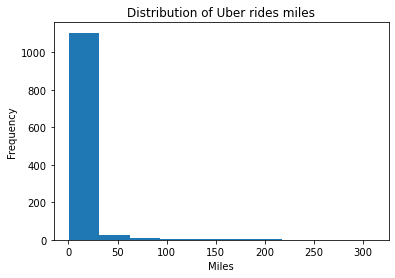

In [125]:
#Checking the distribution of miles of the Uber rides:

data['Miles'].plot.hist()
plt.title('Distribution of Uber rides miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

The user uses Uber rides mostly for short trips (< 25 miles). A very small percentage of the trips have covered > 25 miles distance.

Text(0.5, 1.0, 'Number of Uber rides per month')

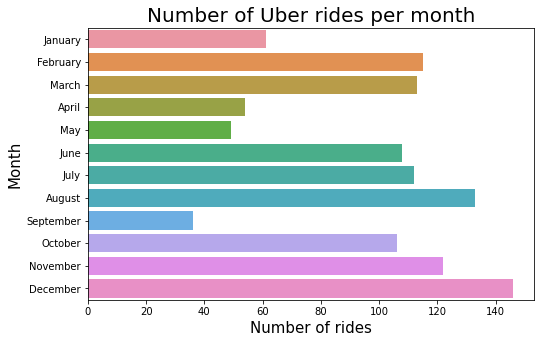

In [126]:
#Checking the number of rides per month:

plt.figure(figsize=(8,5))
abc = sns.countplot(y='Month', data = data)
abc.set_yticklabels(abc.get_yticklabels())
abc.set_xlabel("Number of rides", fontsize = 15)
abc.set_ylabel("Month", fontsize = 15)
abc.set_title('Number of Uber rides per month', fontsize = 20)

The user has taken maximum Uber rides in the month of December, followed by August and November.

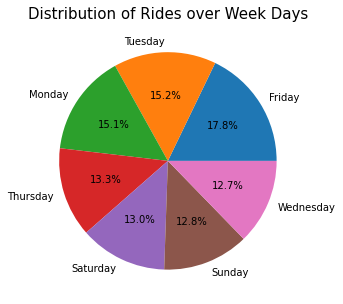

In [127]:
#Checking the percentage of the number of rides per day of the week:

types = data["Day_of_the_Week"].value_counts()
labels = types.index
values = types.values

plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.rc('font', size=12)
plt.title("Distribution of Rides over Week Days", fontsize=15)
plt.show()


The user has preferred 17.8 % of total Uber rides on Friday, followed by rides on Tuesday and Monday. On rest of the days, the user has taken almost similar number of rides.

In [128]:
#Determining the number of trips per week day:

data.groupby("Day_of_the_Week")["Start_Point"].count()

Day_of_the_Week
Friday       206
Monday       174
Saturday     150
Sunday       148
Thursday     154
Tuesday      176
Wednesday    147
Name: Start_Point, dtype: int64

Out of 1155 trips, there is almost symmetrical distribution of the trips on all the week days.

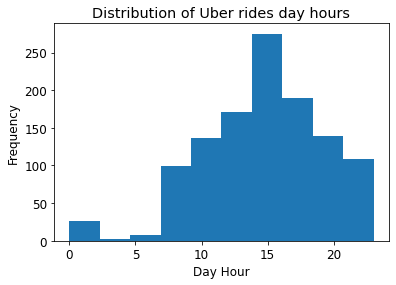

In [129]:
#Checking the preferred time of the day for Uber rides:

data['Hour'].plot.hist()
plt.title('Distribution of Uber rides day hours')
plt.xlabel('Day Hour')
plt.ylabel('Frequency')
plt.show()

From the plot, it is evident that the user takes Uber rides mostly during the afternoon. A very few rides have been taken in the early morning.

In [31]:
#Determing the miles coverage where the starting and ending points are same:

Required_Miles = data.loc[data['Start_Point'] == data['Stop_Point']]
Required_Miles


,Start_Date,End_Date,Category,Start_Point,Stop_Point,Miles,Purpose,Hour,Day_of_the_Week,Month,Ride_Duration,zscore_Miles
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,00:06:00,-0.253340
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,00:12:00,-0.257974
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,00:13:00,-0.267242
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,00:14:00,-0.271876
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,Wednesday,January,00:04:00,-0.290412
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,15,Friday,December,00:22:00,-0.276510
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,16,Friday,December,00:23:00,-0.276510
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23,Friday,December,00:04:00,-0.452606
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,Saturday,December,00:07:00,-0.457240


Out of 1155 trips, 288 trips (approximately 25% trips) have similar starting and ending locations and their miles coverage is also less. This indicates that either the trips have been cancelled or the data is wrongly entered or the user books Uber from his starting place and returns back to the initial location in the same trip. This needs to be figured out.

In [131]:
#Determining the number of trips booked per month:

data.groupby("Month")["Miles"].count()

Month
April         54
August       133
December     146
February     115
January       61
July         112
June         108
March        113
May           49
November     122
October      106
September     36
Name: Miles, dtype: int64

In [132]:
#Determining the total miles coverage per month:

data.groupby("Month")["Miles"].sum()


Month
April        1113.0
August       1335.5
December      981.3
February      908.2
January       512.9
July         1224.6
June          842.8
March        1693.9
May           363.8
November      816.9
October      1810.0
September     601.8
Name: Miles, dtype: float64

Interestingly, in December, the Uber has booked the maximum number of rides but the total miles covered is not very high. This means in December, the user has covered many short trips. The opposite trend is seen in the month of April where the user has covered very long trips but the number of trips are low.

From the Exploratory Data Analysis of the Uber rides data, following conclusions can be made:

1. The distribution of the user's Uber rides seems interesting. Having overall similar distribution of trips on all the week days, December is the month when user has taken a lot of short rides while April is the month when the user has taken a small number of long rides.
2. The user probability that this user cancels the trip is very very low (around 0.3% ).
3. Most of the pickups and dropoffs occurred at Cary, Morrisville, Whitebridge, Islamabad etc. other than the unknown locations.
4. The longest ride duration is 5 hours 36 minutes which covers 195.6 miles while the maximum miles covered by the user is 310.3 miles which has taken 5 hours 30 minutes.
5. The user has taken Uber rides mainly for Business reasons. For mostly rides, the purpose is unknown. Besides this, main purposes include meeting and meal or entertainment.
6. Most of the rides have covered < 25 miles. The average distance covered is around 21 miles.
7. The user travels by Uber mostly during the day hours. 
